# <font style="color:rgb(50,120,229)"> EE5/7382 – Fundamentals of Computer Vision - Homework 1 
</font>

##### **<font color="red">Image Denoising (3+5+5+2+10+15)=40 points</font>**
The purpose of this exercise is to simulate image denoising by averaging. 
Please use the Hubble Galaxy image (HubbleImage_Gray.png) supplied with the assignment to complete the assignment. Note that the supplied image is free of noise. You are required to simulate corruption of the image by adding white Gaussian noise. 
<br>
The noise should have zero mean and a standard deviation of 50 gray levels.
<br>
The task may be accomplished using the numpy function `randn(...)`

##### <font color="yellow">Preamble</font>

In [1]:
# Preamble
import cv2 as cv
import sys
import matplotlib.pyplot as plt
import numpy as np

#### <font color="yellow">Helper functions</font>

In [2]:
# Helper functions
def im2double(im):
    info = np.iinfo(im.dtype) # Get the data type of the input image
    return im.astype(float) / info.max # Divide all values by the largest possible value in the datatype

#### <font color="yellow">Read the grayscale image using imread  (3 points)</font>
WARNING: Do not convert the `uint8` image to `float` by calling `im2double()`.<br>
We are trying to simulate noisy observations from an image sensor.<br>
Each noisy image will be an `uint8` image.

In [3]:
# Code to read the image using imread()
im_original = cv.imread('HubbleImageGray.png',cv.IMREAD_GRAYSCALE)

# Code to compute size of image
sz = im_original.shape

# Number of observations
numObservations = 200

# Standard deviation of Gaussian noise
sigma = 50

# NOTE: The standard deviation in expressed in gray level spanning (0,255).

#### <font color="yellow">Generating noise patterns (5 points)</font>
* Generate 200 independent realizations of <b>zero-mean white Gaussian noise</b> with $\sigma=50$ using `randn()`
   <br>
   Lookup https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html <br>
   Since the size of the image variable `im_original` is available in `sz`, try <br>
   ```np.random.randn(sz[0],sz[1],200)```
   
* You will have to scale the output of `randn()` by $sigma$ as the function only produces random numbers with zero mean and $\sigma=1$ (unit standard deviation)

* Store the output of `randn()` in the variable `noise`

In [4]:
# Generate the noise array with size sz[0] x sz[1] x 200
noise = sigma * np.random.randn(sz[0], sz[1], numObservations)

#### <font color="yellow">Create 200 copies of the original image using `repeat()` (5 points)</font>
*  Lookup https://numpy.org/doc/stable/reference/generated/numpy.repeat.html<br>
   Say you are given a $31 \times 21$ matrix `mtx`, and we would like to create $101$ copies along the third dimension.<br>
   We could do this as folows:<br><br>
   * reshape $31 \times 21$ matrix into $31 \times 21 \times 1$ tensor
   <br>```mtx = mtx.reshape(*(mtx.shape),1)```     # 
   <br>The ```*(mtx.shape)``` operation unpacks the values of ```mtx.shape``` to yield $[31,21]$
   <br>See https://geekflare.com/python-unpacking-operators/ for additional help
   <br><br>
   * replicate array along the third dimension
   <br>```arr3D = np.repeat(mtx,101,axis=2)```   
   <br>
* Check the size of ```arr3D``` using ```print(arr3D.shape)```.
  It should be $31 \times 21 \times 101$

In [10]:
# Create 200 copies of image
mtx = im_original.reshape(*(im_original.shape),1)
arr3D = np.repeat(mtx,200,axis=2)
# Check size
print("size: ",arr3D.shape)

(665, 1024)
size:  (665, 1024, 200)


#### <font color="yellow">Simulate the injection of noise in an uint8 image (2 points)</font>
Add the arrays `arr3D` and `noise`. <br>
Round the result to the nearest integer using `np.round(...)`. <br>
Store the result in the array `im_noisy`

In [11]:
# Code goes here
im_noisy=np.round(arr3D+noise)

### <font color="yellow">Ensure that `im_noisy` only has values in the range (0,255)</font>

* Say you are given a variable `var`
* Now suppose we would like to clip the value of `var` so that its between (0,255)
* We could do that with the following code:<br>
   ```var_clip = np.maximum( np.minimum(var,255), 0)```
   <br>
   The inner function call `np.minimum` clips values exceeding 255
   <br>
   The outer function call `np.maximum` clips values below 0

In [12]:
# <noisy_im> could contain values outside the uint8 range
im_noisy = np.maximum( np.minimum(im_noisy,255) , 0)  # clip to range

#### <font color="yellow">Step-1: Implement denoising by temporal averaging of the first 25 images</font>

In [13]:
numImages2Avg = 25
im_denoised = np.mean(im_noisy[:,:,0:numImages2Avg-1],axis=2)

print('Averaging ',numImages2Avg,' frames')
print('\t Largest value: ', np.max(im_denoised))        # should be <= 255
print('\t Smallest value: ', np.min(im_denoised))       # should be >= 0

Averaging  25  frames
	 Largest value:  249.70833333333334
	 Smallest value:  3.125


###### The first line of code extracts the first `numImages2Avg` from the 3D array `im_noisy` and computes their average using the `mean()` function.<br> The `axis=2` option ensures that we are computing the average along the third dimension.<br> Basically we are interested in computing the average intensity of a noisy image

#### <font color="yellow">Step-2: Assessing the quality of denoising using MSE (Mean Squared Error)</font>
A useful metric for assessing the quality of denoising is the Mean Squared Error (MSE) between the original image and the result of denoising. It is defined as mean value of the squared difference in image intensity for each pixel in the original and denoised images. A MSE of zero means that the two images are identical. 

In [14]:
err = im_original - im_denoised     # Error = Difference between original & denoised
sqrd_err = err**2                   # Compute the Squared Error 
mse = np.mean(sqrd_err)             # Mean of the Squared Error

# Display MSE
str = 'MSE for {0} images = {1:.3f}'.format(numImages2Avg,mse)
print(str)

MSE for 25 images = 169.437


#### <font color="yellow">Step-3: Plot the result using matplotlib</font>

Text(0.5, 1.0, 'MSE for 25 images = 169.437')

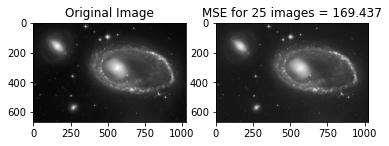

In [15]:
f = plt.figure()                        # Create a figure window
f.add_subplot(1,2,1); 
plt.imshow(im_original,cmap='gray')     # Display original image
plt.title('Original Image')

f.add_subplot(1,2,2); 
plt.imshow(im_denoised,cmap='gray')     # Display denoised image
plt.title(str)

#### <font color="yellow">Repeat Steps 1,2 & 3 for 50,100,150 and 200 observations (10 points)</font> 
Furnish your code here

* for 50 observations 

Averaging  50  frames
	 Largest value:  246.59183673469389
	 Smallest value:  7.142857142857143
MSE for 50 images = 136.685


Text(0.5, 1.0, 'MSE for 50 images = 136.685')

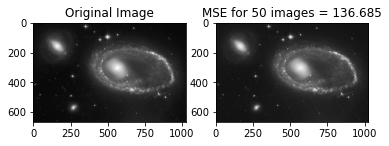

In [22]:
numImages2Avg = 50
im_denoised_50 = np.mean(im_noisy[:,:,0:numImages2Avg-1],axis=2)

print('Averaging ',numImages2Avg,' frames')
print('\t Largest value: ', np.max(im_denoised_50))        # should be <= 255
print('\t Smallest value: ', np.min(im_denoised_50))       # should be >= 0

err = im_original - im_denoised_50     # Error = Difference between original & denoised
sqrd_err = err**2                   # Compute the Squared Error 
mse = np.mean(sqrd_err)             # Mean of the Squared Error

# Display MSE
str = 'MSE for {0} images = {1:.3f}'.format(numImages2Avg,mse)
print(str)

f = plt.figure()                        # Create a figure window
f.add_subplot(1,2,1); 
plt.imshow(im_original,cmap='gray')     # Display original image
plt.title('Original Image')

f.add_subplot(1,2,2); 
plt.imshow(im_denoised_50,cmap='gray')     # Display denoised image
plt.title(str)

* for 100 observations

Averaging  100  frames
	 Largest value:  241.1919191919192
	 Smallest value:  11.484848484848484
MSE for 100 images = 121.037


Text(0.5, 1.0, 'MSE for 100 images = 121.037')

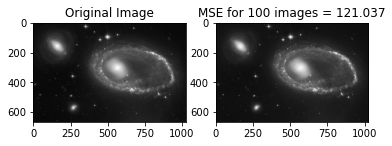

In [23]:
numImages2Avg = 100
im_denoised_100 = np.mean(im_noisy[:,:,0:numImages2Avg-1],axis=2)

print('Averaging ',numImages2Avg,' frames')
print('\t Largest value: ', np.max(im_denoised_100 ))        # should be <= 255
print('\t Smallest value: ', np.min(im_denoised_100 ))       # should be >= 0

err = im_original - im_denoised_100      # Error = Difference between original & denoised
sqrd_err = err**2                   # Compute the Squared Error 
mse = np.mean(sqrd_err)             # Mean of the Squared Error

# Display MSE
str = 'MSE for {0} images = {1:.3f}'.format(numImages2Avg,mse)
print(str)

f = plt.figure()                        # Create a figure window
f.add_subplot(1,2,1); 
plt.imshow(im_original,cmap='gray')     # Display original image
plt.title('Original Image')

f.add_subplot(1,2,2); 
plt.imshow(im_denoised_100 ,cmap='gray')     # Display denoised image
plt.title(str)

* for 150 observations

Averaging  150  frames
	 Largest value:  240.1275167785235
	 Smallest value:  14.516778523489933
MSE for 150 images = 115.714


Text(0.5, 1.0, 'MSE for 150 images = 115.714')

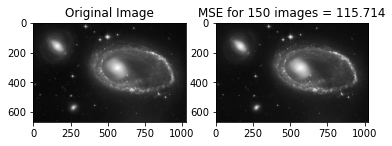

In [24]:
numImages2Avg = 150
im_denoised_150 = np.mean(im_noisy[:,:,0:numImages2Avg-1],axis=2)

print('Averaging ',numImages2Avg,' frames')
print('\t Largest value: ', np.max(im_denoised_150))        # should be <= 255
print('\t Smallest value: ', np.min(im_denoised_150))       # should be >= 0

err = im_original - im_denoised_150     # Error = Difference between original & denoised
sqrd_err = err**2                   # Compute the Squared Error 
mse = np.mean(sqrd_err)             # Mean of the Squared Error

# Display MSE
str = 'MSE for {0} images = {1:.3f}'.format(numImages2Avg,mse)
print(str)

f = plt.figure()                        # Create a figure window
f.add_subplot(1,2,1); 
plt.imshow(im_original,cmap='gray')     # Display original image
plt.title('Original Image')

f.add_subplot(1,2,2); 
plt.imshow(im_denoised_150,cmap='gray')     # Display denoised image
plt.title(str)

* for 200 observations

Averaging  200  frames
	 Largest value:  238.48743718592965
	 Smallest value:  14.457286432160805
MSE for 200 images = 113.163


Text(0.5, 1.0, 'MSE for 200 images = 113.163')

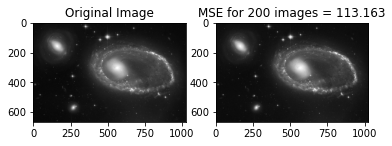

In [25]:
numImages2Avg = 200
im_denoised_200 = np.mean(im_noisy[:,:,0:numImages2Avg-1],axis=2)

print('Averaging ',numImages2Avg,' frames')
print('\t Largest value: ', np.max(im_denoised_200))        # should be <= 255
print('\t Smallest value: ', np.min(im_denoised_200))       # should be >= 0

err = im_original - im_denoised_200     # Error = Difference between original & denoised
sqrd_err = err**2                   # Compute the Squared Error 
mse = np.mean(sqrd_err)             # Mean of the Squared Error

# Display MSE
str = 'MSE for {0} images = {1:.3f}'.format(numImages2Avg,mse)
print(str)

f = plt.figure()                        # Create a figure window
f.add_subplot(1,2,1); 
plt.imshow(im_original,cmap='gray')     # Display original image
plt.title('Original Image')

f.add_subplot(1,2,2); 
plt.imshow(im_denoised_200,cmap='gray')     # Display denoised image
plt.title(str)

#### <font color="yellow">Compare the result of denoising by temporal averaging with spatial filtering using `cv.GaussianBlur` (15 points)</font>

Lookup the code in <b>Module-3-Demos.ipynb</b> for help in implementing this portion of the homework.

* Pick $\sigma=5$ for the Gaussian kernel.
* Make sure the kernel size is an ODD integer and atleast $6\sigma \times 6\sigma \Rightarrow 31 \times 31$ 
* Only blur the first image in the 3D array `im_noisy`. To access the first image try `im_noisy[:,:,0]`.
  Recall Python arrays are zero-indexed.
* Store the result of filtering in the image `im_fltrd`
* Compute the MSE between the original image `im_original` and the filtered image `im_fltrd`
* Compare with the MSE obtained by temporal averaging 25,50,100,150,200 observations
* Compare the visual quality of the denoised images, by plotting the result.<br>
  HINT: Replicate the code in Step-3 of denoising by temporal averaging.

In [21]:
# Define the Gaussian kernel parameters
sigma = 5.0
kernel_size=(31,31)
# Apply Gaussian blur to the first image in im_noisy
im_fltrd = cv.GaussianBlur(src=im_noisy[:, :, 0], ksize=kernel_size, sigmaX=sigma,sigmaY=sigma)  # Apply filter

#Computing the MSE between the original image im_original and the filtered image im_fltrd
err_blur = im_original - im_fltrd    # Error = Difference between original & blured
sqrd_err_blur = err_blur**2                   # Compute the Squared Error 
mse_blur = np.mean(sqrd_err_blur)             # Mean of the Squared Error

# Display MSE
str = 'MSE between original and blur images is = {0:.3f}'.format(mse_blur)
print(str)

MSE between original and blur images is = 170.339


* Compare with the MSE obtained by temporal averaging 25,50,100,150,200 observations:

The MSE obtained by spatial filtering is higher than all MSE obtained by temporal filtering

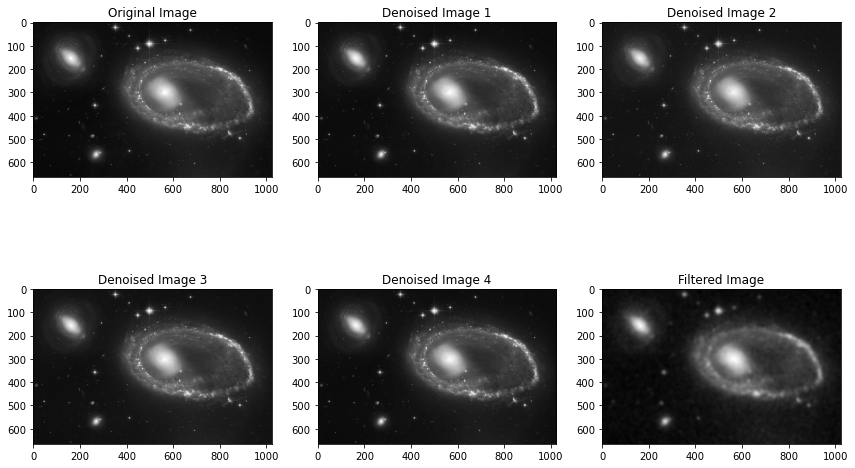

In [28]:
import matplotlib.pyplot as plt

# Create a figure window with specified subplot layout
f = plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
f.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the spacing as needed

# Subplot 1: Original Image
f.add_subplot(2, 3, 1)
plt.imshow(im_original, cmap='gray')
plt.title('Original Image')

# Subplot 2: Denoised Image 1
f.add_subplot(2, 3, 2)
plt.imshow(im_denoised, cmap='gray')
plt.title('Denoised Image 1')

# Subplot 3: Denoised Image 2
f.add_subplot(2, 3, 3)
plt.imshow(im_denoised_50, cmap='gray')
plt.title('Denoised Image 2')

# Subplot 4: Denoised Image 3
f.add_subplot(2, 3, 4)
plt.imshow(im_denoised_100, cmap='gray')
plt.title('Denoised Image 3')

# Subplot 5: Denoised Image 4
f.add_subplot(2, 3, 5)
plt.imshow(im_denoised_150, cmap='gray')
plt.title('Denoised Image 4')

# Subplot 6: Filtered Image
f.add_subplot(2, 3, 6)
plt.imshow(im_fltrd, cmap='gray')
plt.title('Blured Image')

plt.tight_layout()  # Automatically adjusts subplot parameters for tight layout

plt.show()
